In [122]:
import os
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report

from utils import stopwords

In [123]:
df = pd.read_csv("datav3.csv")
n = (len(df["Label"]))
x = []
y = []
for i in range(0, n):
    x.append(df["Comment"][i])
    y.append(df["Label"][i])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25,
                                                                    random_state=0)


In [124]:
vocab = {}
for i in range(len(x_train)):
    word_list = []
    for word in x_train[i].split():
        new_word = word.strip(string.punctuation).lower()
        # if (len(new_word) > 2) and (new_word not in stopwords):
        if len(new_word) > 2:
            if new_word in vocab:
                vocab[new_word] += 1
            else:
                vocab[new_word] = 1


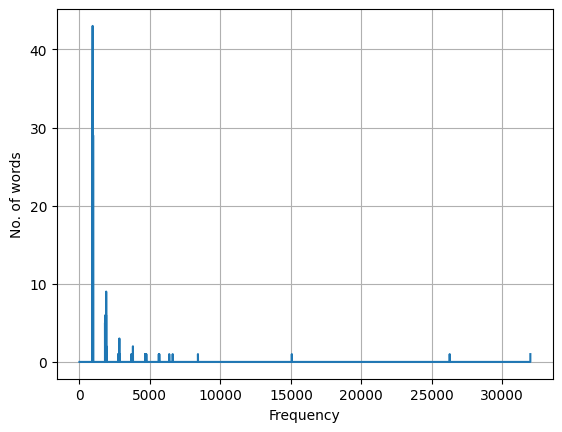

In [125]:
num_words = [0 for i in range(max(vocab.values()) + 1)]
freq = [i for i in range(max(vocab.values()) + 1)]
for key in vocab:
    num_words[vocab[key]] += 1
plt.plot(freq, num_words)
# plt.axis((1, 10, 0, 100))
plt.xlabel("Frequency")
plt.ylabel("No. of words")
plt.grid()
plt.show()

In [126]:
cutoff_freq = 1
features = []
for key in vocab:
    if vocab[key] >= cutoff_freq:
        features.append(key)

print(features)

['the', 'road', 'infrastructure', 'our', 'city', 'has', 'deteriorated', 'alarming', 'extent', 'there', 'are', 'large', 'potholes', 'broken', 'pavements', 'and', 'poorly', 'maintained', 'traffic', 'signals', 'which', 'have', 'led', 'increase', 'accidents', 'every', 'monsoon', 'situation', 'gets', 'worse', 'waterlogging', 'further', 'damages', 'roads', 'making', 'them', 'nearly', 'unusable', 'for', 'commuters', 'several', 'requests', 'been', 'submitted', 'municipal', 'corporation', 'yet', 'timely', 'action', 'taken', 'high', 'time', 'that', 'concerned', 'authorities', 'address', 'this', 'issue', 'repairing', 'installing', 'proper', 'drainage', 'systems', 'ensuring', 'maintenance', 'prevent', 'damage', 'please', 'escalate', 'matter', 'soon', 'possible', 'improve', 'urban', 'congestion', 'strongly', 'recommend', 'implementing', 'real-time', 'monitoring', 'system', 'integrated', 'with', 'ai-based', 'adaptive', 'signal', 'control', 'mechanism', 'many', 'cities', 'worldwide', 'successfully', 

In [127]:
x_train_dataset = np.zeros((len(x_train), len(features)))
for i in range(len(x_train)):
    word_list = [word.strip(string.punctuation).lower() for word in x_train[i].split()]
    for word in word_list:
        if word in features:
            x_train_dataset[i][features.index(word)] += 1
print(x_train_dataset)

[[6. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [3. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 1. 1. 1.]
 [5. 0. 0. ... 0. 0. 0.]]


In [128]:
x_test_dataset = np.zeros((len(x_test), len(features)))
for i in range(len(x_test)):
    word_list = [word.strip(string.punctuation).lower() for word in x_train[i].split()]
    for word in word_list:
        if word in features:
            x_train_dataset[i][features.index(word)] += 1


In [133]:
from sklearn.naive_bayes import MultinomialNB

# Using sklearn's Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(x_train_dataset, y_train)
Y_test_pred = clf.predict(x_test_dataset)
sklearn_score_train = clf.score(x_train_dataset, y_train)
print("Sklearn's score on training data :", sklearn_score_train)
sklearn_score_test = clf.score(x_test_dataset, y_test)
print("Sklearn's score on testing data :", sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(y_test, Y_test_pred, zero_division=1))

ValueError: Found input variables with inconsistent numbers of samples: [7500, 10000]

In [130]:
for i in range(0, len(y_test), 10):
    print("[", Y_test_pred[i], y_test[i], "]")

[ Inquiry Complaint ]
[ Inquiry Complaint ]
[ Inquiry Compliment ]
[ Inquiry Inquiry ]
[ Inquiry Suggestion ]
[ Inquiry Suggestion ]
[ Inquiry Complaint ]
[ Inquiry Inquiry ]
[ Inquiry Compliment ]
[ Inquiry Complaint ]
[ Inquiry Compliment ]
[ Inquiry Complaint ]
[ Inquiry Compliment ]
[ Inquiry Complaint ]
[ Inquiry Inquiry ]
[ Inquiry Compliment ]
[ Inquiry Inquiry ]
[ Inquiry Suggestion ]
[ Inquiry Inquiry ]
[ Inquiry Complaint ]
[ Inquiry Inquiry ]
[ Inquiry Complaint ]
[ Inquiry Suggestion ]
[ Inquiry Compliment ]
[ Inquiry Compliment ]
[ Inquiry Suggestion ]
[ Inquiry Complaint ]
[ Inquiry Compliment ]
[ Inquiry Compliment ]
[ Inquiry Suggestion ]
[ Inquiry Suggestion ]
[ Inquiry Complaint ]
[ Inquiry Complaint ]
[ Inquiry Inquiry ]
[ Inquiry Complaint ]
[ Inquiry Suggestion ]
[ Inquiry Compliment ]
[ Inquiry Inquiry ]
[ Inquiry Inquiry ]
[ Inquiry Compliment ]
[ Inquiry Compliment ]
[ Inquiry Complaint ]
[ Inquiry Inquiry ]
[ Inquiry Compliment ]
[ Inquiry Compliment ]
[ Inquir

In [131]:
import random

print(classification_report(y_test, [
    random.choice(['Complaint', 'Inquiry', 'Suggestion', 'Compliment']) for _ in y_test]))

              precision    recall  f1-score   support

   Complaint       0.22      0.21      0.22       630
  Compliment       0.25      0.27      0.26       613
     Inquiry       0.27      0.28      0.28       603
  Suggestion       0.24      0.22      0.23       654

    accuracy                           0.24      2500
   macro avg       0.24      0.25      0.24      2500
weighted avg       0.24      0.24      0.24      2500



In [132]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Load datasets
df_train = pd.read_csv("datav3.csv")
df_test = pd.read_csv("test.csv")

# Extract features and labels
X_train = df_train["Comment"]
y_train = df_train["Label"].map(
    {"Complaint": 0, "Inquiry": 1, "Suggestion": 2, "Compliment": 3})
X_test = df_test["Comment"]
y_test = df_test["Label"].map(
    {"Complaint": 0, "Inquiry": 1, "Suggestion": 2, "Compliment": 3})

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()


# Initialize weights and bias
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    k = len(np.unique(y))  # Number of classes
    weights = np.zeros((n, k))
    bias = np.zeros(k)
    y_one_hot = np.eye(k)[y]  # One-hot encoding

    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        predictions = softmax(linear_model)

        error = predictions - y_one_hot

        weights -= lr * np.dot(X.T, error) / m
        bias -= lr * np.mean(error, axis=0)

    return weights, bias


def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    predictions = softmax(linear_model)
    return np.argmax(predictions, axis=1)


# Train model
weights, bias = train_logistic_regression(X_train_tfidf, y_train.to_numpy())

# Predictions
y_pred = predict(X_test_tfidf, weights, bias)

# Convert numerical predictions back to labels
label_map = {0: "Complaint", 1: "Inquiry", 2: "Suggestion", 3: "Compliment"}
y_pred_labels = np.array([label_map[val] for val in y_pred])
y_test_labels = np.array([label_map[val] for val in y_test])

# Print results
print("Accuracy on Training Data:",
      accuracy_score(y_train, predict(X_train_tfidf, weights, bias)))
print("Accuracy on Testing Data:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))


Accuracy on Training Data: 1.0
Accuracy on Testing Data: 0.0
Classification Report:
              precision    recall  f1-score   support

   Complaint       0.00      0.00      0.00       1.0
  Compliment       0.00      0.00      0.00       1.0
  Suggestion       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

